![title](qgr.png)

# Simulating Correlated Brownian Motions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
np.__version__

'1.21.2'

In [3]:
mpl.__version__

'3.4.3'

### Welcome to Quant Guild Research!

In this notebook we will look at two methods of simulating correlated Brownian motions.

Let us first start by motiving the simulation of these correlated random walks, consider the following chart...


![title](vix-graph.png)

The image above depicts positive movements in the S&P 500 as being correlated with negative movements in the VIX and vice versa. This is not a causal relationship by any means (correlation does not imply causation) but rather a useful empiric to note in modeling practice.

In fact, many assets are correlated with one another in some fashion. Therefore to better assess portfolio risk or perhaps develop more accurate derivative prices (think contracts on multiple underlying simultaneously) it becomes necessary to impose a correlation structure in our stochastic models.

Herein we will explore two different ways to accomplish this. One will use the infamous Cholesky decomposition and the other will take a more analytical approach to impose the correlation structure.

### Simulating Correlated Brownian Motions Method I

#### Cholesky Decomposition for Correlated Brownian Motions

A Hermitian positive-definite matrix $A$ may be decomposed into

$$A = LL^T$$

Mathematical jargon aside you may think of a "Hermitian positive-definite matrix" as something like a correlation matrix. The actual decomposition (LL^T) is then easily computed programmatically.

In [4]:
# Correlation coefficient
rho = -.7

# Correlation structure
C = np.array([[1, rho], [rho, 1]])

print('Correlation Matrix: ')
print(np.array(C))

Correlation Matrix: 
[[ 1.  -0.7]
 [-0.7  1. ]]


Now that we have developed the correlation structure its time to develop the Brownian motions themselves.  Here we will be using a step size of one day (1/252) and a path length of one thousand days.

In [5]:
# Step size
dt = 1/252

# Brownian motions (each path indexed by X[0], X[1])
X = np.random.normal(0, (dt**(1/2)), (2, 1000))

The Cholesky decomposition is implemented below in one line using numpy!

In [6]:
L = np.linalg.cholesky(C)

In [7]:
print('Lower Triangular Matrix: ')
print(L)

Lower Triangular Matrix: 
[[ 1.          0.        ]
 [-0.7         0.71414284]]


In [8]:
print('Upper Triangular Matrix: ')
print(L.T)

Upper Triangular Matrix: 
[[ 1.         -0.7       ]
 [ 0.          0.71414284]]


Here we can see the reconstruction of $C$ by taking the dot product of $LL^T$

In [9]:
C = np.dot(L, L.T)
print('Reconstructed Decomposition: ')
print(C)

Reconstructed Decomposition: 
[[ 1.  -0.7]
 [-0.7  1. ]]


To impose the correlation structure on the Brownian motions all we have to do is take the dot product of the Cholesky decomposition with the paths...

In [10]:
# CX is a matrix of two Brownian motions
CX = np.dot(L, X)

Here we visualize the correlated paths...

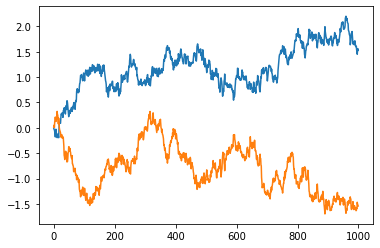

In [11]:
for path in CX:
    plt.plot(path.cumsum())

We can see the correlation matrix in the increment and path space by calling numpy's correlation function...

In [12]:
print('Imposed Correlation on Brownian Motion Paths')
np.corrcoef(np.array([CX[0].cumsum(), CX[1].cumsum()]))

Imposed Correlation on Brownian Motion Paths


array([[ 1.        , -0.62813226],
       [-0.62813226,  1.        ]])

In [13]:
print('Imposed Correlation on Brownian Motion Increments')
np.corrcoef(np.array([CX[0], CX[1]]))

Imposed Correlation on Brownian Motion Increments


array([[ 1.        , -0.67811706],
       [-0.67811706,  1.        ]])

### Simulating Correlated Brownian Motions Method II

#### Analytical Method for Generating Correlated Brownian Motions

$$W_t^2 = \rho W_t^1 + \sqrt{1-\rho^2}Z_t$$

$$Z_t \perp W_t^1$$

$$dW_t^1, dZ_t \sim N(0, \sqrt{dt})$$

Here we can see that $Z_t$ and $W^1_t$ are Brownian motions driving the $W^2_t$ process, satisfying equation the first equation will yield two Brownian motions correlated by the coefficient $\rho$.

First, we will establish the $Z_t$ process.  Instead of regenerating a Brownian motion we will use one of the paths from before so we can yield the same result...

In [14]:
Zt = X[1]

Here we establish the $W^1_t$ process, same data, same result...

In [15]:
Wt1 = X[0]

Lastly, we construct the correlated Brownian motion by satisfying the first equation...

In [16]:
Wt2 = rho*Wt1 + np.sqrt(1-(rho**2))*Zt

Let's go ahead and plot the two paths...

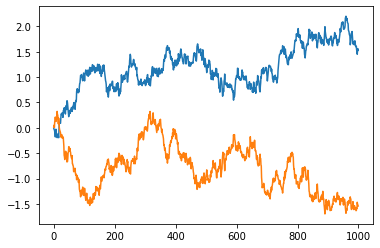

In [17]:
plt.plot(Wt1.cumsum())
plt.plot(Wt2.cumsum())

Just as above, we can see the correlation matrix in the increment and path space by calling numpy's correlation function...

In [18]:
print('Imposed Correlation on Brownian Motion Paths')
np.corrcoef(np.array([Wt1.cumsum(), Wt2.cumsum()]))

Imposed Correlation on Brownian Motion Paths


array([[ 1.        , -0.62813226],
       [-0.62813226,  1.        ]])

In [19]:
print('Imposed Correlation on Brownian Motion Increments')
np.corrcoef(np.array([Wt1, Wt2]))

Imposed Correlation on Brownian Motion Increments


array([[ 1.        , -0.67811706],
       [-0.67811706,  1.        ]])

They match and we have successfully showed two ways of generating correlated Brownian motions!

© 2022, Quant Guild